In [3]:
library(Seurat)
library(data.table)
library(ggplot2)
#library(flexclust)

In [4]:
datasetName = "/stor/public/hcad/Bronchus_BronchialEpithelialCell_Plasschaert2018/Bronchus_BronchialEpithelialCell_Plasschaert"

# analysis

In [86]:
# Load the organized dataset
data.matrix <- read.table(paste0(datasetName,"_expression.tsv"), h = T, row.names=1)

In [87]:
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)

In [5]:
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”

In [6]:
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")

In [7]:
# QC
dataobj <- subset(dataobj,subset = (donor_ID!='donor3'& nFeature_RNA > 1500 & percent.mt < 25)|(donor_ID=='donor3'& nFeature_RNA > 2000 & percent.mt < 25))

In [14]:
dataobj

An object of class Seurat 
25475 features across 2604 samples within 1 assay 
Active assay: RNA (25475 features)

In [8]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Centering and scaling data matrix


Warning message:
“Transformation introduced infinite values in continuous x-axis”

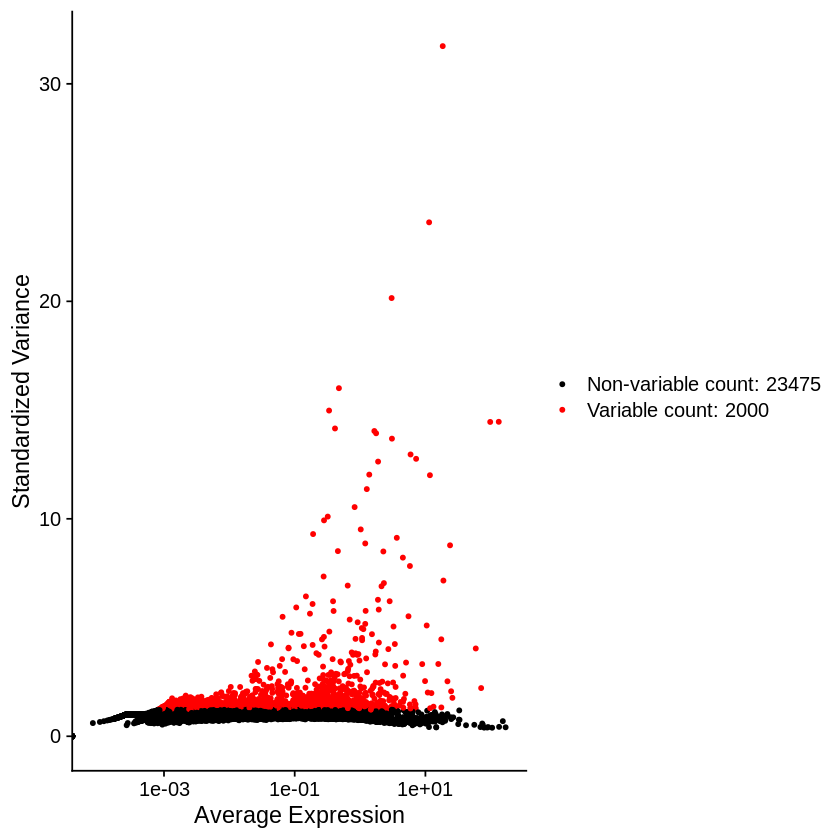

In [16]:
VariableFeaturePlot(dataobj)

Warning message:
“The following arguments are not used: nfeatures”PC_ 1 
Positive:  SERPINB3, EPAS1, CXCL17, SERPINB4, S100A9, IGFBP3, TCN1, ID1, S100A2, GLUL 
	   CRABP2, NDRG1, RDH10, S100A14, UPK1B, CSTA, MT1X, S100A16, KRT5, ACKR3 
	   ARRDC3, SOX4, PVRL1, ITGB1, CYP2F1, FAM83A, CYP1B1, S100P, FABP5, FOXQ1 
Negative:  TPPP3, CCDC17, RSPH1, SNTN, C20orf85, PIFO, C9orf24, TUBA1A, C1orf194, CRIP1 
	   CCDC170, CAPS, EFHC1, DNAAF1, C9orf116, FAM92B, CCDC74A, IGFBP7, FOXJ1, MS4A8 
	   CCDC74B, LRRC10B, TUBB4B, ROPN1L, CTXN1, RRAD, CTGF, CETN2, DRC1, PRR29 
PC_ 2 
Positive:  BPIFB1, PIGR, CD74, WFDC2, SLPI, C3, LCN2, XBP1, SCGB3A1, BPIFA1 
	   HLA-DRA, CYP2F1, HLA-DRB1, VMO1, RARRES1, B2M, CFB, HLA-B, CYP2B7P, PRSS23 
	   TGM2, RARRES3, CP, HLA-DRB5, UBD, SCGB1A1, MSMB, ALDH1A1, SLC34A2, PROM1 
Negative:  KRT13, KRT5, HSPB1, S100A2, ANXA8L1, ANXA8, CSTA, KRT6A, SPRR1B, UPK3BL 
	   LGALS7, POLR2J3, LGALS7B, KRT15, S100A10, PKP1, LYPD3, SFN, IL1RN, AQP3 
	   DSC3, KRT17, PVRL1, TRIM29, SER

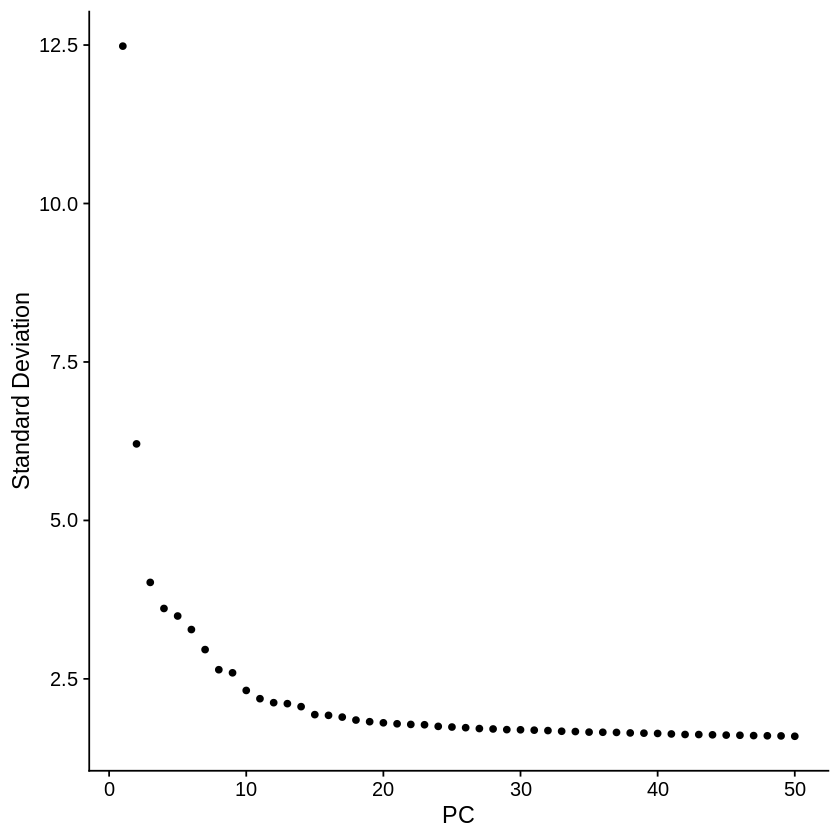

In [9]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj,nfeatures = 2000))
ElbowPlot(dataobj,50)

In [10]:
pcDim = 30
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”19:20:06 UMAP embedding parameters a = 0.9922 b = 1.112
19:20:06 Read 2604 rows and found 30 numeric columns
19:20:06 Using Annoy for neighbor search, n_neighbors = 30
19:20:06 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
19:20:06 Writing NN index file to temp file /tmp/RtmpGEzr7X/file1beed5d15f1
19:20:06 Searching Annoy index using 1 thread, search_k = 3000
19:20:07 Annoy recall = 100%
19:20:07 Commencing smooth kNN distance calibration using 1 thread
19:20:08 Initializing from normalized Laplacian + noise
19:20:08 Commencing optimization

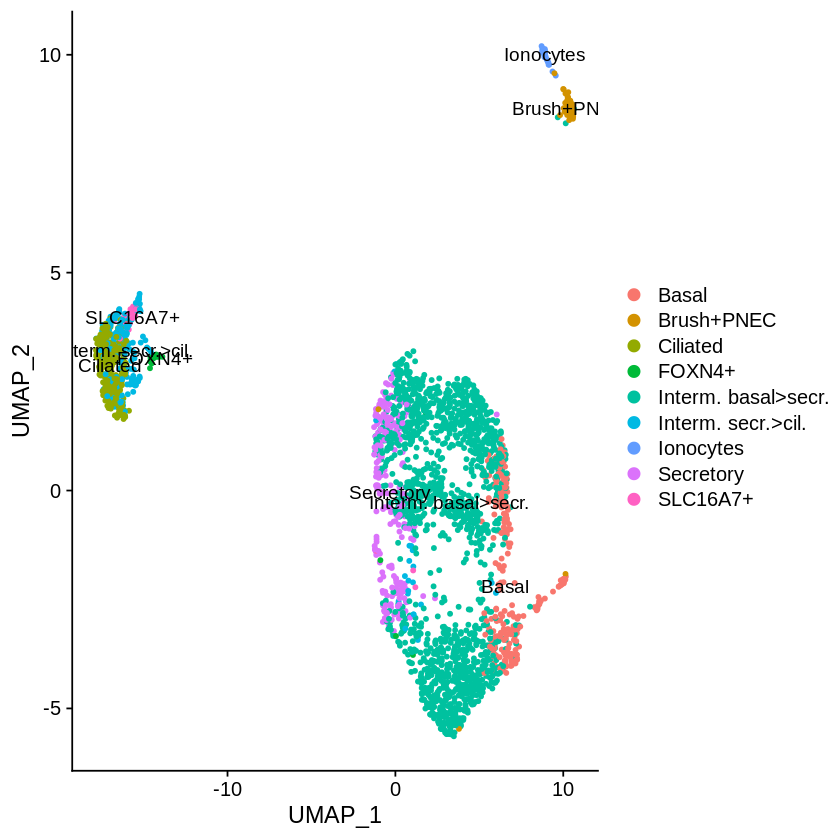

In [66]:
p_umap <- DimPlot(dataobj, reduction = "umap", group.by = 'cell_cluster',label = TRUE, pt.size=1)
p_umap

In [15]:
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap, width = 8, height = 5)

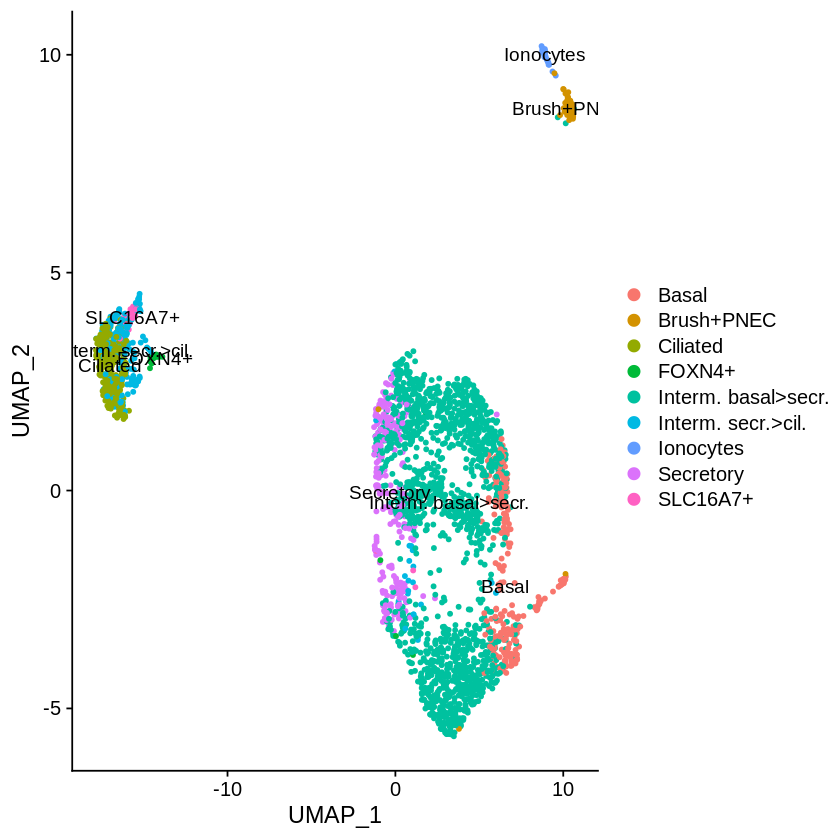

In [67]:
DimPlot(dataobj, reduction = "umap", group.by = 'cell_cluster',label = TRUE, pt.size=1)

In [73]:
# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:30, nn.eps = 0.5)
dataobj <- FindClusters(dataobj, resolution = 0.8, n.start = 10)
randIndex(dataobj$cell_cluster,dataobj$seurat_clusters)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2604
Number of edges: 120637

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8076
Number of communities: 12
Elapsed time: 0 seconds


ARI 
0.1873046

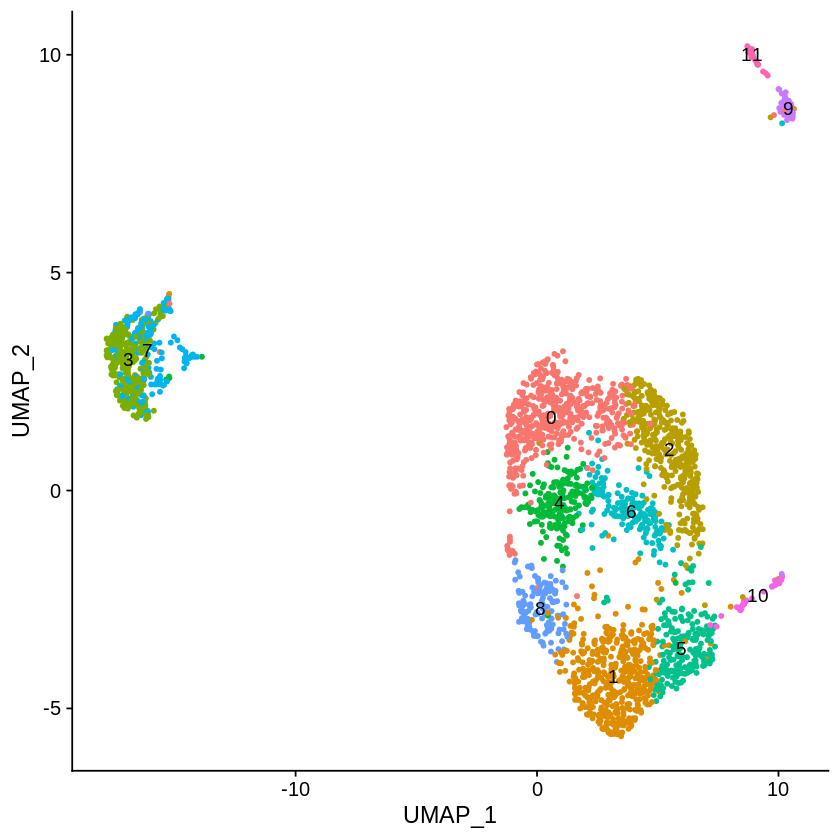

In [74]:
p_umap2 <- DimPlot(dataobj, reduction = "umap",group.by = 'seurat_clusters', label = TRUE, pt.size=1)+NoLegend()
p_umap2

In [75]:
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap2, width = 8, height = 5)

In [19]:
# Finding cluster markers 
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11


In [20]:
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

# Annotation

In [6]:
#dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))
# Load marker file
dataobj.markers <- read.table(file ="/stor/public/hcad/db_v1/Bronchus_BronchialEpithelialCell_Plasschaert2018/Bronchus_BronchialEpithelialCell_Plasschaert.seurat.markers.txt", h = T, sep = "\t")

In [8]:
dataobj.markers[dataobj.markers['cluster']==7,]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
2368,1.436681e-87,0.9639722,0.842,0.157,3.659946e-83,7,CCDC17
2369,1.717543e-87,0.8641071,0.781,0.132,4.375441e-83,7,DNAAF1
2370,1.866743e-87,1.1371100,0.890,0.192,4.755529e-83,7,FOXJ1
2371,6.445680e-75,0.9062603,0.822,0.179,1.642037e-70,7,CCDC74A
2372,1.042849e-72,1.0066440,0.897,0.250,2.656659e-68,7,EFHC1
2373,2.083262e-72,1.2254883,0.973,0.323,5.307110e-68,7,TPPP3
2374,4.841324e-69,0.7691288,0.705,0.138,1.233327e-64,7,ZMYND10
2375,4.843760e-69,0.8030565,0.767,0.162,1.233948e-64,7,CCDC74B
2376,1.837657e-68,1.0601115,0.938,0.312,4.681432e-64,7,RSPH1


In [60]:
dataobj.markers[dataobj.markers['gene']=='FOXI1',]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
4281,2.884844e-59,1.511706,0.688,0.049,7.349139e-55,11,CFTR


In [76]:
new.cluster.ids <- c(   "Unknown",# Basal>Goblet
                        "Unknown",# Basal>Goblet
                        "Bronchi-Epithelial Tissue-Basal cell-KRT15",
                        "Bronchi-Epithelial Tissue-Ciliated columnar cell-FOXJ1 CCDC78",
                        "Bronchi-Epithelial Tissue-Goblet cell-AGR2 MUC5B ",
                        "Bronchi-Epithelial Tissue-Basal cell-KRT15 PLP2",
                        "Unknown",# Basal>Goblet
                        "Unknown",# Goblet>Ciliated
                        "Bronchi-Epithelial Tissue-Goblet cell-AGR2 FCGBP",
                        "Bronchi-Epithelial Tissue-Brush cell/Perineural epithelial cell-AZGP1 GYS2",
                        "Bronchi-Epithelial Tissue-Basal cell-KRT15 PLP2",#10
                        "Bronchi-Epithelial Tissue-lonocyte-FOXI1 CFTR"#？
                     )

In [77]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
plot <- DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size = 1) + NoLegend()

In [83]:
dataobj@meta.data$hcad.label <- Idents(dataobj)

In [85]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

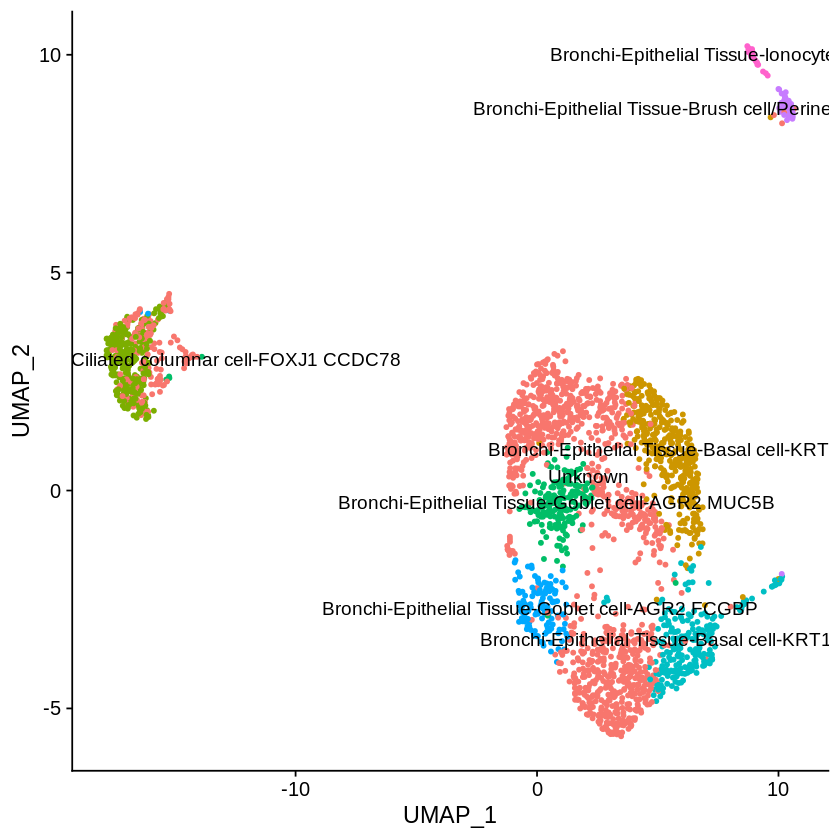

In [78]:
plot

In [79]:
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = plot, width = 8, height = 5)

In [80]:
df_hca <- data.frame(rownames(dataobj@meta.data),Idents(dataobj))
colnames(df_hca) <- c('cell_ID', 'cell_cluster')

In [82]:
write.table(df_hca, file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = T)

# update annotation 

In [51]:
dataobj <- readRDS("/stor/public/hcad/db_v1/Bronchus_BronchialEpithelialCell_Plasschaert2018/Bronchus_BronchialEpithelialCell_Plasschaert2018.seuratobj.dbupload_v1.rds")

In [52]:
table(dataobj$hcad_name)


                                Bronchi-Epithelial tissue-Basal cell-KRT15 
                                                                       391 
                           Bronchi-Epithelial tissue-Basal cell-KRT15 PLP2 
                                                                       234 
Bronchi-Epithelial tissue-Brush cell/Perineural epithelial cell-AZGP1 GYS2 
                                                                        45 
             Bronchi-Epithelial tissue-Ciliated columnar cell-FOXJ1 CCDC78 
                                                                       277 
                          Bronchi-Epithelial tissue-Goblet cell-AGR2 FCGBP 
                                                                       133 
                          Bronchi-Epithelial tissue-Goblet cell-AGR2 MUC5B 
                                                                       198 
                             Bronchi-Epithelial tissue-lonocyte-FOXI1 CFTR 
           

In [53]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Centering and scaling data matrix



In [54]:
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))
dataobj <- RunUMAP(dataobj, dims = 1:50)

PC_ 1 
Positive:  TPT1, RPS18, SERPINB3, TMSB4X, RPLP0, RPL14, RPS18P9, RPS2, RPS3, RPL12 
	   RPL37, SERPINB4, GRN, RPS4X, S100A9, RPS29, RPS24, RPL35, CXCL17, RPS23 
	   RPL32, TCN1, SNHG29, RPS6, IGFBP3, RPL34, CTSC, MGST1, RPL39, EEF1B2 
Negative:  CCDC17, DNAAF1, PIFO, CIBAR2, C1orf194, C20orf85, SNTN, MS4A7, C9orf24, LRRC10B 
	   ROPN1L, CCDC74A, RRAD, FOXJ1, CCDC74B, PRR29, CCDC170, CNRIP1, DRC1, DNAI1 
	   TPPP3, CCN2, EFHC1, RSPH1, IGFBP7, FAM166B, CAPSL, CTXN1, C9orf116, ZMYND10 
PC_ 2 
Positive:  PIGR, BPIFB1, C3, CD74, CYP2F1, WFDC2, XBP1P1, HLA-DRA, RARRES1, HLA-DRB1 
	   VMO1, SCGB3A1, LCN2, CFB, CYP2B7P, BPIFA1, TGM2, SLPI, PRSS23, CP 
	   HLA-B, PLAAT4, HLA-DRB5, UBD, PROM1, B2M, MUC1, MSMB, SLC34A2, ALDH1A1 
Negative:  ANXA8L1, ANXA8, KRT13, SPRR1B, KRT6A, KRT5, CSTA, LGALS7, LGALS7B, HSPB1 
	   S100A2, LYPD3, UPK3BL1, POLR2J3, PKP1, IL1RN, KRT15, DSC2, S100A10, SERPINB5 
	   KRT17, ITGA6, PLP2, TRIM29, SERPINB13, KRT16, DSP, NECTIN1, FBLN1, DSG3 
PC_ 3 
Positive:  SLP

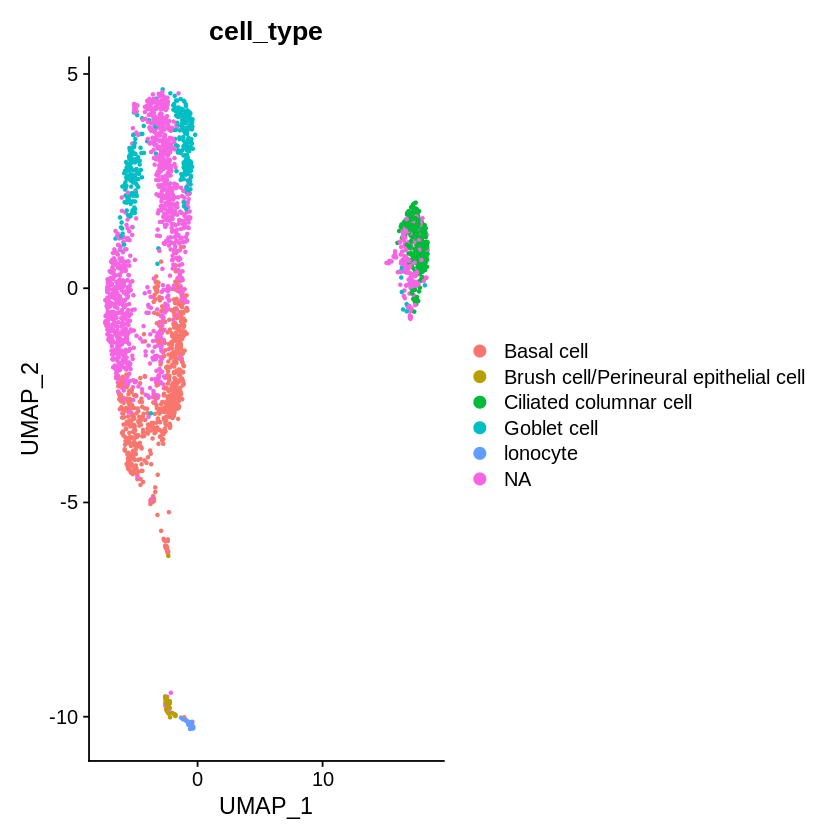

In [55]:
DimPlot(dataobj,group.by="cell_type")

In [56]:
# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:30, nn.eps = 0.5)
dataobj <- FindClusters(dataobj, resolution = 0.8, n.start = 10)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2604
Number of edges: 122012

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8072
Number of communities: 11
Elapsed time: 0 seconds


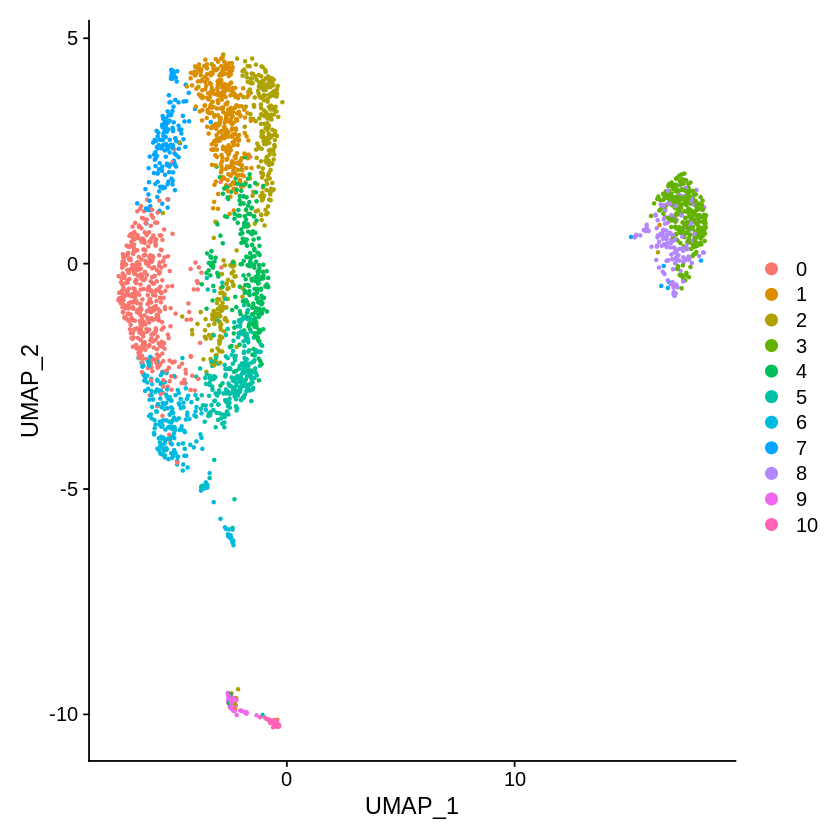

In [57]:
DimPlot(dataobj)


In [64]:
dataobj$hcad_name[dataobj$hcad_name =="Unknown"] <- "Unclassified"

In [65]:
dataobj$cell_type[dataobj$hcad_name =="Unclassified"& Idents(dataobj) == 1] <- "Goblet cell"
dataobj$marker_gene[dataobj$hcad_name =="Unclassified"& Idents(dataobj) == 1] <- "AGR2 FCGBP"
dataobj$tissue_type[dataobj$hcad_name =="Unclassified"& Idents(dataobj) == 1] <- "Epithelial tissue"
dataobj$hcad_name[dataobj$hcad_name =="Unclassified"& Idents(dataobj) == 1] <- "Bronchi-Epithelial tissue-Goblet cell-AGR2 FCGBP"

In [66]:
dataobj$cell_type[dataobj$hcad_name =="Unclassified"& Idents(dataobj) == 8] <- "Goblet cell/Ciliated columnar cell"
dataobj$marker_gene[dataobj$hcad_name =="Unclassified"& Idents(dataobj) == 8] <- "FOXJ1 TPPP3"
dataobj$tissue_type[dataobj$hcad_name =="Unclassified"& Idents(dataobj) == 8] <- "Epithelial tissue"
dataobj$hcad_name[dataobj$hcad_name =="Unclassified"& Idents(dataobj) == 8] <- "Bronchi-Epithelial tissue-Goblet cell/Ciliated columnar cell-FOXJ1 TPPP3"

In [67]:
dataobj$cell_type[dataobj$hcad_name =="Unclassified"] <- "Goblet cell/Basal cell"

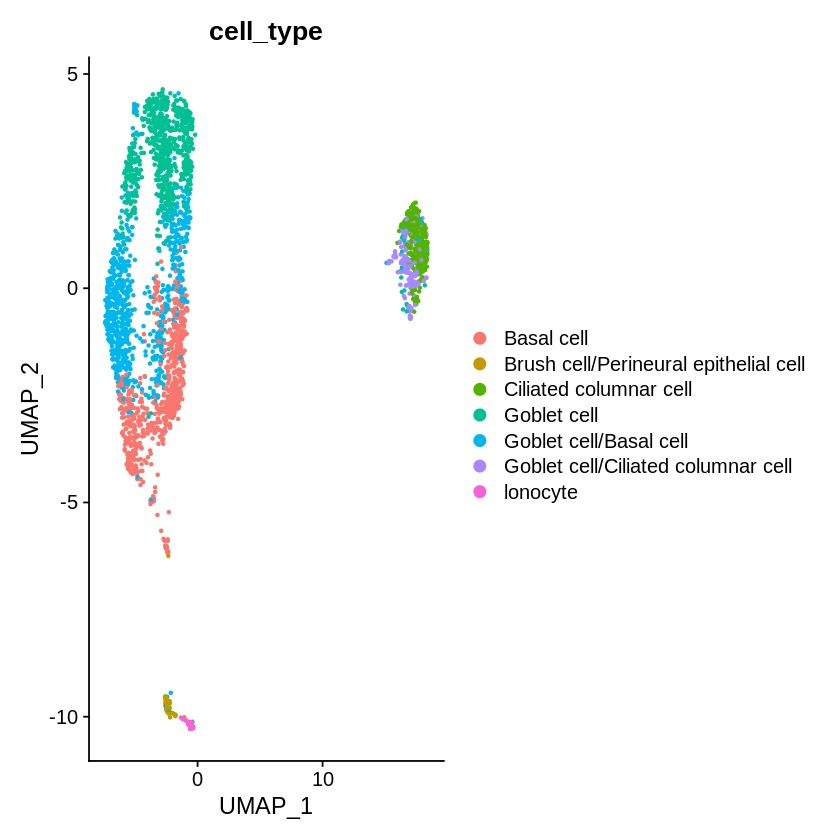

In [68]:
DimPlot(dataobj,group.by = "cell_type")

In [69]:
Idents(dataobj) <- "cell_type"

In [70]:
mk <- FindMarkers(dataobj, ident.1 = "Goblet cell/Basal cell",only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

In [115]:
mk[mk$`pct.1`>0.75 & mk$`pct.2`<0.7,]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KRT4,1.006235e-31,0.5747292,0.754,0.662,4.415160e-27
CSTA,1.182604e-25,0.3853903,0.821,0.596,5.189029e-21
KRT7,3.525972e-24,0.3530371,0.830,0.696,1.547126e-19


In [71]:
dataobj$marker_gene[dataobj$hcad_name =="Unclassified"] <- "KRT4 KRT7"
dataobj$tissue_type[dataobj$hcad_name =="Unclassified"] <- "Epithelial tissue"
dataobj$hcad_name[dataobj$hcad_name =="Unclassified"] <- "Bronchi-Epithelial tissue-Goblet cell/Basal cell-KRT4 KRT7"

In [72]:
unique(dataobj$hcad_name)

[1] "Bronchi-Epithelial tissue-Goblet cell/Ciliated columnar cell-FOXJ1 TPPP3"  
[2] "Bronchi-Epithelial tissue-Basal cell-KRT15 PLP2"                           
[3] "Bronchi-Epithelial tissue-Ciliated columnar cell-FOXJ1 CCDC78"             
[4] "Bronchi-Epithelial tissue-Goblet cell/Basal cell-KRT4 KRT7"                
[5] "Bronchi-Epithelial tissue-Goblet cell-AGR2 FCGBP"                          
[6] "Bronchi-Epithelial tissue-Brush cell/Perineural epithelial cell-AZGP1 GYS2"
[7] "Bronchi-Epithelial tissue-lonocyte-FOXI1 CFTR"                             
[8] "Bronchi-Epithelial tissue-Goblet cell-AGR2 MUC5B"                          
[9] "Bronchi-Epithelial tissue-Basal cell-KRT15"

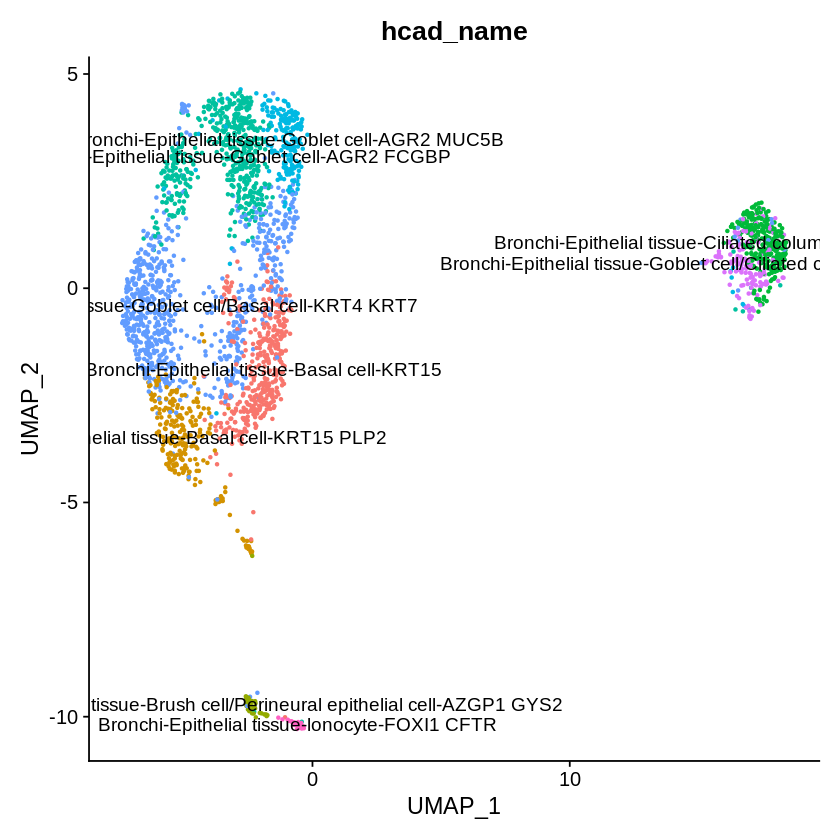

In [73]:
DimPlot(dataobj,group.by="hcad_name",label = TRUE) + NoLegend()

In [74]:
dataobj@meta.data <- dataobj@meta.data[,!names(dataobj@meta.data)%in%c("RNA_snn_res.0.8","seurat_clusters")]

In [75]:
dataobj@meta.data

,user_id,study_id,cell_id,organ,region,subregion,seq_tech,sample_status,donor_id,donor_gender,donor_age,original_name,cl_name,hcad_name,tissue_type,cell_type,marker_gene,cid
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
donor1_bcEJUM,2,10.1038/s41586-018-0394-6,donor1_bcEJUM,Bronchi,NA,NA,InDrops,Healthy,donor1,NA,NA,Interm. secr.>cil.,NA,Bronchi-Epithelial tissue-Goblet cell/Ciliated columnar cell-FOXJ1 TPPP3,Epithelial tissue,Goblet cell/Ciliated columnar cell,FOXJ1 TPPP3,2150154
donor1_bcCETZ,2,10.1038/s41586-018-0394-6,donor1_bcCETZ,Bronchi,NA,NA,InDrops,Healthy,donor1,NA,NA,Basal,NA,Bronchi-Epithelial tissue-Basal cell-KRT15 PLP2,Epithelial tissue,Basal cell,KRT15 PLP2,2150155
donor1_bcCFYR,2,10.1038/s41586-018-0394-6,donor1_bcCFYR,Bronchi,NA,NA,InDrops,Healthy,donor1,NA,NA,Ciliated,NA,Bronchi-Epithelial tissue-Ciliated columnar cell-FOXJ1 CCDC78,Epithelial tissue,Ciliated columnar cell,FOXJ1 CCDC78,2150156
donor1_bcCYRU,2,10.1038/s41586-018-0394-6,donor1_bcCYRU,Bronchi,NA,NA,InDrops,Healthy,donor1,NA,NA,SLC16A7+,NA,Bronchi-Epithelial tissue-Ciliated columnar cell-FOXJ1 CCDC78,Epithelial tissue,Ciliated columnar cell,FOXJ1 CCDC78,2150157
donor1_bcETWG,2,10.1038/s41586-018-0394-6,donor1_bcETWG,Bronchi,NA,NA,InDrops,Healthy,donor1,NA,NA,Interm. secr.>cil.,NA,Bronchi-Epithelial tissue-Goblet cell/Ciliated columnar cell-FOXJ1 TPPP3,Epithelial tissue,Goblet cell/Ciliated columnar cell,FOXJ1 TPPP3,2150158
donor1_bcEWIT,2,10.1038/s41586-018-0394-6,donor1_bcEWIT,Bronchi,NA,NA,InDrops,Healthy,donor1,NA,NA,Interm. basal>secr.,NA,Bronchi-Epithelial tissue-Goblet cell/Basal cell-KRT4 KRT7,Epithelial tissue,Goblet cell/Basal cell,KRT4 KRT7,2150159
donor1_bcCHVB,2,10.1038/s41586-018-0394-6,donor1_bcCHVB,Bronchi,NA,NA,InDrops,Healthy,donor1,NA,NA,Interm. basal>secr.,NA,Bronchi-Epithelial tissue-Goblet cell/Basal cell-KRT4 KRT7,Epithelial tissue,Goblet cell/Basal cell,KRT4 KRT7,2150160
donor1_bcDOQQ,2,10.1038/s41586-018-0394-6,donor1_bcDOQQ,Bronchi,NA,NA,InDrops,Healthy,donor1,NA,NA,Interm. basal>secr.,NA,Bronchi-Epithelial tissue-Goblet cell/Basal cell-KRT4 KRT7,Epithelial tissue,Goblet cell/Basal cell,KRT4 KRT7,2150161
donor1_bcCJJN,2,10.1038/s41586-018-0394-6,donor1_bcCJJN,Bronchi,NA,NA,InDrops,Healthy,donor1,NA,NA,Interm. basal>secr.,NA,Bronchi-Epithelial tissue-Goblet cell/Basal cell-KRT4 KRT7,Epithelial tissue,Goblet cell/Basal cell,KRT4 KRT7,2150162


In [76]:
saveRDS(dataobj, "/stor/public/hcad/db_v1.1/Bronchus_BronchialEpithelialCell_Plasschaert2018/Bronchus_BronchialEpithelialCell_Plasschaert2018.seuratobj.dbupload_v1.1.rds")